This exercise is about designing a Machine Learning model for "California House Pricing Prediction". 
The dataset is taken from https://www.kaggle.com/datasets/camnugent/california-housing-prices

The following implementation serves as a learning-by-doing exercise done as part of the "Certificate Course on Artificial Intelligence and Deep Learning by IIT Roorkee".

In [2]:
# import the libraries
import numpy as np
import pandas as pd
import sklearn as skl
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings

In [3]:
np.random.seed(42)

# set the rc params to change the label size for the plots' axes, x- and y-axis ticks using rc method
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# ignore non-essential warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [4]:
# load the housing dataset
HOUSING_PATH = "artifacts/housing.csv"
housing = pd.read_csv(HOUSING_PATH)
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
# Explore the dataset - Understand more about it
# Use the info method to get more information on the dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# Get a better understand of the mean, standard deviation, 
# maximum value and other such information from the dataset by using the describe method
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


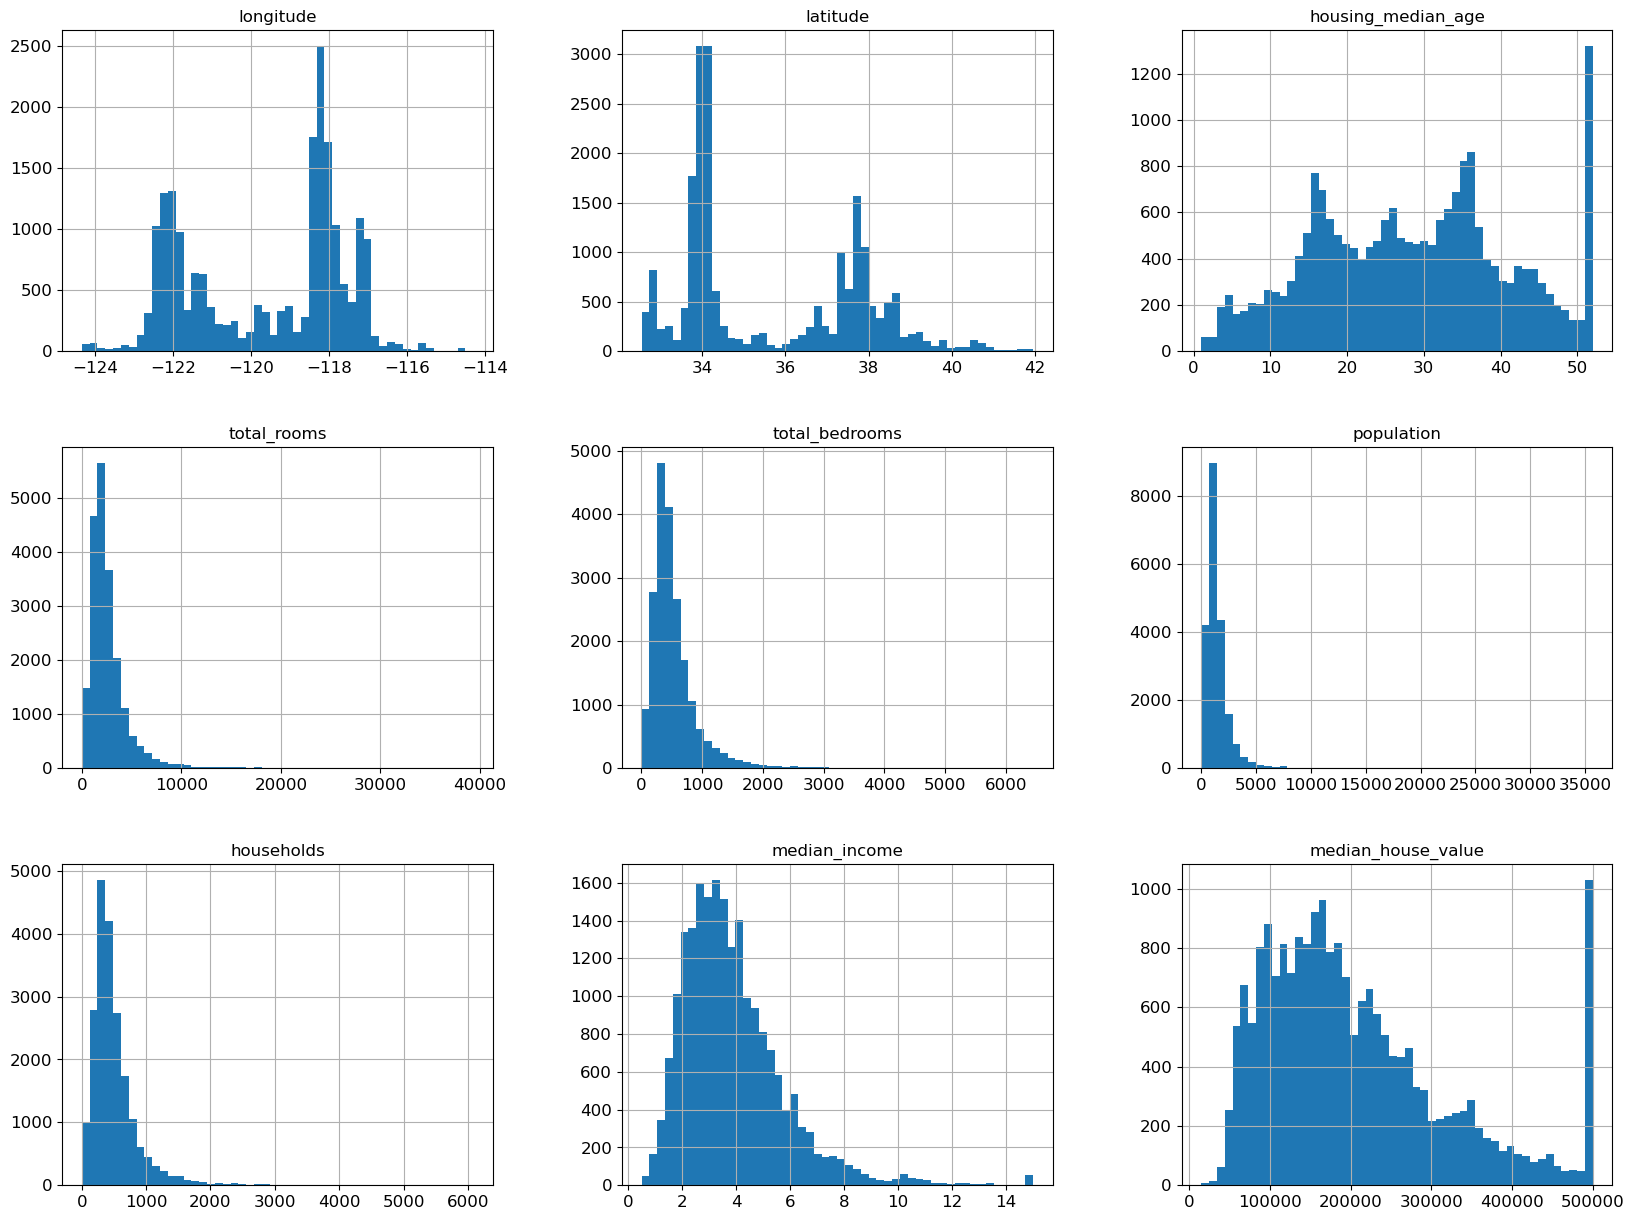

In [7]:
# Plot histograms of all the features using hist method
housing.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: >

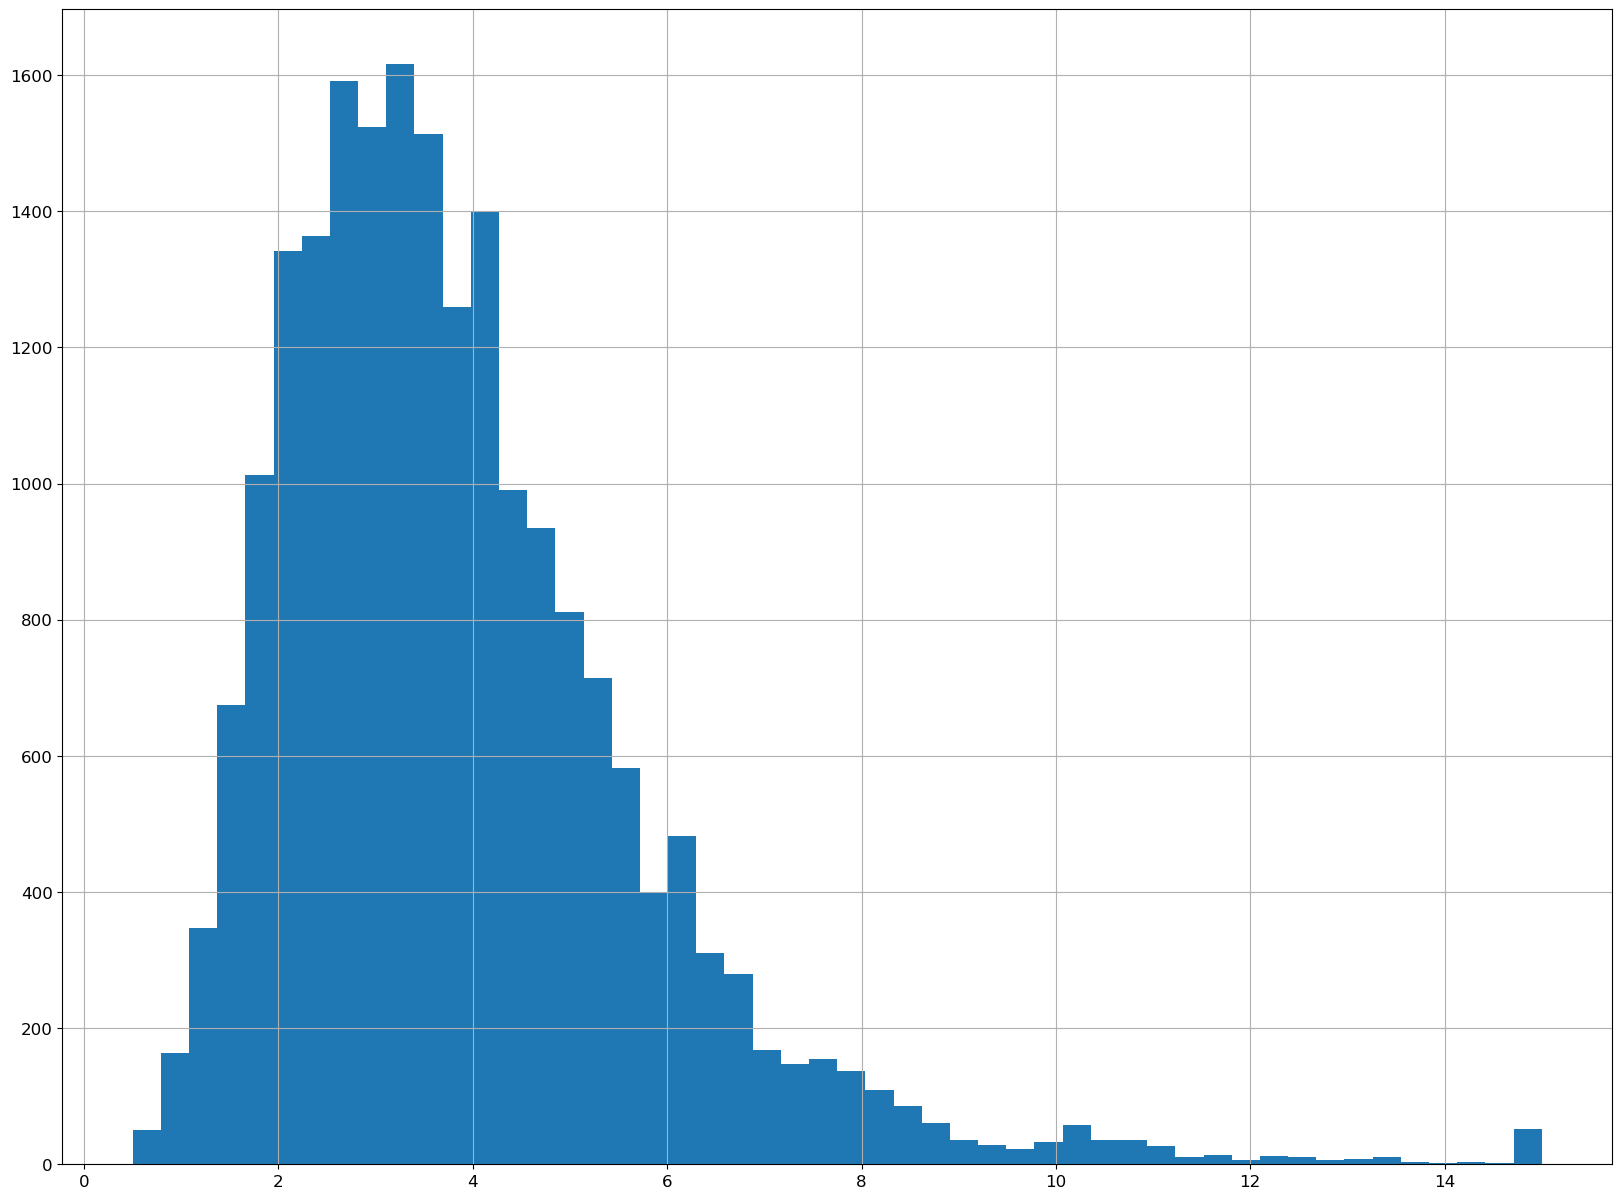

In [8]:
# Plot a histogram of the median income attribute of the dataset
housing["median_income"].hist(bins=50, figsize=(20,15))

<Axes: >

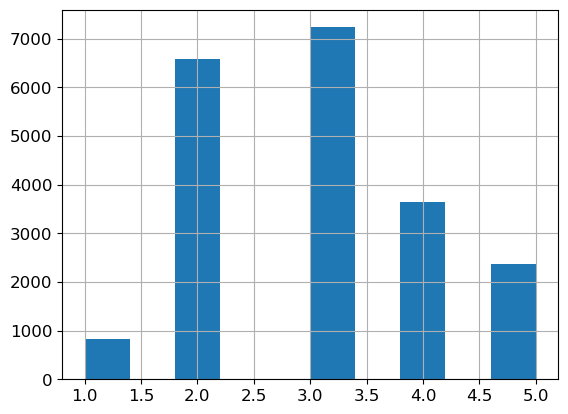

In [9]:
# Divide the median income attribute into bins and labels using the cut method, and then plot another histogram of the same
housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

housing["income_cat"].hist()

In [10]:
# Import StratifiedShuffleSplit from sklearn
from sklearn.model_selection import StratifiedShuffleSplit

# Now let's divide the dataset in a 80-20 split, for this you need to set the test_size as 0.2
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set  = housing.loc[test_index]

In [11]:
# Finally, we will drop the income_cat column from both the train and test set since it is the attribute that our model will predict. 
# For this we will use the drop method
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

Visualize the geographic distribution of the data

In [13]:
# First, create a copy of the strat_train_set dataset and save it in the housing variable using the copy method
housing = strat_train_set.copy()

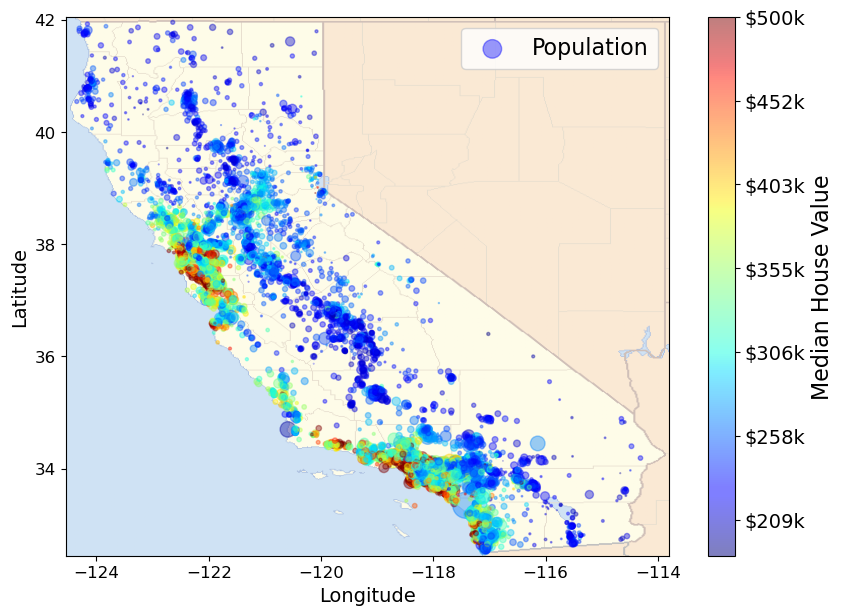

In [14]:
# Now let's plot the scatter plot using Matplotlib as shown below.
import matplotlib.image as mpimg
california_img=mpimg.imread('artifacts/california.png')
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

Create a correlation matrix

In [16]:
# First we will create 3 new features from the existing features as shown below
housing["rooms_per_household"]      = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]        = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [17]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
12655,-121.46,38.52,29.0,3873.0,797.0,2237.0,706.0,2.1736,72100.0,INLAND,5.485836,0.205784,3.168555
15502,-117.23,33.09,7.0,5320.0,855.0,2015.0,768.0,6.3373,279600.0,NEAR OCEAN,6.927083,0.160714,2.623698
2908,-119.04,35.37,44.0,1618.0,310.0,667.0,300.0,2.8750,82700.0,INLAND,5.393333,0.191595,2.223333
14053,-117.13,32.75,24.0,1877.0,519.0,898.0,483.0,2.2264,112500.0,NEAR OCEAN,3.886128,0.276505,1.859213
20496,-118.70,34.28,27.0,3536.0,646.0,1837.0,580.0,4.4964,238300.0,<1H OCEAN,6.096552,0.182692,3.167241
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15174,-117.07,33.03,14.0,6665.0,1231.0,2026.0,1001.0,5.0900,268500.0,<1H OCEAN,6.658342,0.184696,2.023976
12661,-121.42,38.51,15.0,7901.0,1422.0,4769.0,1418.0,2.8139,90400.0,INLAND,5.571932,0.179977,3.363188
19263,-122.72,38.44,48.0,707.0,166.0,458.0,172.0,3.1797,140400.0,<1H OCEAN,4.110465,0.234795,2.662791
19140,-122.70,38.31,14.0,3155.0,580.0,1208.0,501.0,4.1964,258100.0,<1H OCEAN,6.297405,0.183835,2.411178


In [18]:
# Now let's calculate the correlation coefficient of all the variables using the corr method
# Filter to include only numeric columns
numeric_columns = housing.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

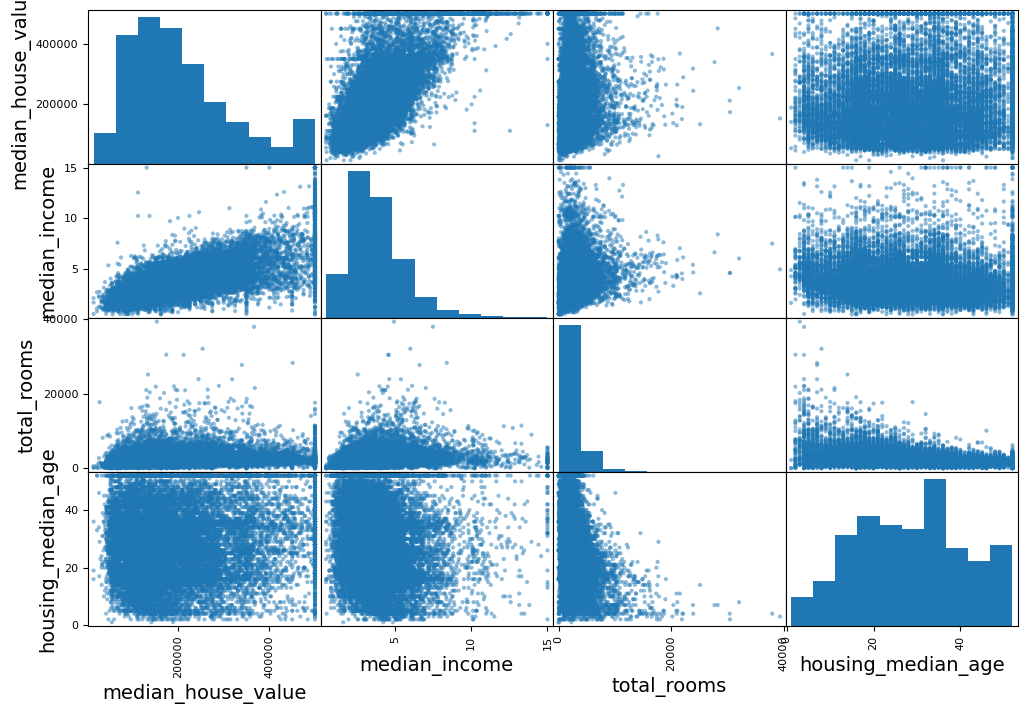

In [19]:
# plot the correlation matrix of all the features. 
# First, we will sort the values using the sort_values method, then we will plot a scatter plot using the scatter_matrix method from Pandas
corr_matrix["median_house_value"].sort_values(ascending=False)

from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [20]:
# let's get more information on the updated dataset with the new added features using the describe method
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,rooms_per_household,bedrooms_per_room,population_per_household
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000
mean,-119.575635,35.639314,28.653404,2622.539789,534.914639,1419.687379,497.011810,3.875884,207005.322372,5.440406,0.212873,3.096469
std,2.001828,2.137963,12.574819,2138.417080,412.665649,1115.663036,375.696156,1.904931,115701.297250,2.611696,0.057378,11.584825
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000,1.130435,0.100000,0.692308
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566950,119800.000000,4.442168,0.175304,2.431352
50%,-118.510000,34.260000,29.000000,2119.000000,433.000000,1164.000000,408.000000,3.541550,179500.000000,5.232342,0.203027,2.817661
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.000000,602.000000,4.745325,263900.000000,6.056361,0.239816,3.281420
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000,141.909091,1.000000,1243.333333


Fill in the missing data

In [22]:
# revert to a clean training set that we got after we used StratifiedShuffleSplit and 
# drop the median_house_value since it is the label that we will predict
housing = strat_train_set.drop("median_house_value", axis=1)

In [23]:
# Now we will store the labels in housing_labels variable
housing_labels = strat_train_set["median_house_value"].copy()

In [24]:
# impute the missing values using the SimpleImputer class. 
# First, import the SimpleImputer class from sklearn
from sklearn.impute import SimpleImputer

for the missing values we will consider the median value for that feature. We are not considering mean since median is a better measure of central tendency as it takes into account the outliers.

In [26]:
# We will set the strategy parameter to "median" in the SimpleImputer class
imputer = SimpleImputer(strategy="median")

In [27]:
# let's drop the categorical column ocean_proximity because median can only be calculated on numerical attributes
housing_num = housing.drop("ocean_proximity", axis=1)

In [28]:
# use fit on the housing_num dataset
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [29]:
# use transform the training set
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                      index=housing.index)

Handling categorical attributes

So far we have only dealt with numerical attributes, but now let’s look at text attributes. In this dataset, there is just one: the ocean_proximity attribute. A Machine Learning model does not understand categorical values, so we will turn this into a numerical value using onehot encoding.

Onehot encoding creates one binary attribute per category: one attribute equal to 1 when the category is <1H OCEAN (and 0 otherwise), another attribute equal to 1 when the category is INLAND (and 0 otherwise), and so on.

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very useful when you have categorical attributes with thousands of categories. After onehot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s except for a single 1 per row. Using up tons of memory mostly to store zeros would be very wasteful, so instead a sparse matrix only stores the location of the nonzero elements.

Let's see how it is done.

In [32]:
# store the categorical feature in a new variable called housing_cat
housing_cat = housing[["ocean_proximity"]]

In [33]:
# what it looks like using the head method
housing_cat.head(10)

,ocean_proximity
12655,INLAND
15502,NEAR OCEAN
2908,INLAND
14053,NEAR OCEAN
20496,<1H OCEAN
1481,NEAR BAY
18125,<1H OCEAN
5830,<1H OCEAN
17989,<1H OCEAN
4861,<1H OCEAN


In [34]:
# let's import OneHotEncoder from sklearn
from sklearn.preprocessing import OneHotEncoder

In [35]:
# fit_transform our categorical data
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [36]:
# convert it to a dense Numpy array using toarray method
housing_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       ...,
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

Creating custom transformer

In [38]:
# import BaseEstimator, and TransformerMixin classes from sklearn
from sklearn.base import BaseEstimator, TransformerMixin

In [39]:
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter, add_bedrooms_per_room, set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the Machine Learning algorithms or not.

Creating Transformation pipelines

As you have seen, there are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the Pipeline class to help with such sequences of transformations.

Here we are using a pipeline to process the data by first imputing it using SimpleImputer, then using the custom transformer created earlier to merge the columns, and finally, use the StandardScaler class to scale the entire training data

In [43]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_ix, bedrooms_ix, population_ix, households_ix = [
    housing.columns.get_loc(c) for c in col_names]

housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

In [44]:
# Finally, we will fit_transform the entire training data
housing_prepared = full_pipeline.fit_transform(housing)

Train a Decision Tree model

Now that we have prepared the data, we will train a Decision Tree model on that data and see how it performs. Since this is a regression problem, we will use the DecisionTreeRegressor class from Scikit-learn.

In [47]:
# Import the DecisionTreeRegressor class from Scikit-learn
from sklearn.tree import DecisionTreeRegressor

In [48]:
# Now let's train the DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

In [49]:
# To evaluate the performance of our model, we will import the mean_squared_error class from Scikit-learn
from sklearn.metrics import mean_squared_error

In [50]:
# Now let's predict using our model using the predict method
housing_predictions = tree_reg.predict(housing_prepared)

In [51]:
# Finally, let's evaluate our model
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

The rmse is 0.0!!! This means that our model is most likely overfitting. How to check and resolve this issue? We will come to that in a bit, but before that we will train a Random Forest model.

Train a Random Forest model

Now let's train a Random Forest model the same way we trained the Decision Tree model and see how it performs.

In [55]:
# Import the RandomForestRegressor class from Scikit-learn
from sklearn.ensemble import RandomForestRegressor

In [56]:
# Now let's train the model with our training data
forest_reg = RandomForestRegressor(n_estimators=30, random_state=42)
forest_reg.fit(housing_prepared, housing_labels)

RandomForestRegressor(n_estimators=30, random_state=42)

In [57]:
# Now we will predict using out model
housing_predictions = forest_reg.predict(housing_prepared)

In [58]:
# Finally, we will evaluate our model
forest_mse = mean_squared_error(housing_labels, housing_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

19675.288257893604

Fine tune your model with Cross Validation

In this step we will fine tune our models using cross validation. It is a resampling technique that is used to evaluate machine learning models on a limited data sample.

A test set should still be kept aside for final evaluation. We would no longer need a validation set (which is sometimes called the dev set) while doing cross validation. The training set is split into k smaller sets (there are other approaches too, but they generally follow the same principles). The following procedure is followed for each of the k folds:

A model is trained using k-1 of the folds as training data
The resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy)
The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop.

Now let's work on fine tuning our models using cross validation.

In [61]:
# First, let's define a function called display_scores that would display the scores, 
# mean, and standard deviation of all the models after applying cross validation
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [62]:
# Now let's import cross_val_score from Scikit-learn
from sklearn.model_selection import cross_val_score

In [63]:
# Now let's calculate the cross validation scores for our Decision Tree model
scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)
display_scores(tree_rmse_scores)

Scores: [72831.45749112 69973.18438322 69528.56551415 72517.78229792
 69145.50006909 79094.74123727 68960.045444   73344.50225684
 69826.02473916 71077.09753998]
Mean: 71629.89009727491
Standard deviation: 2914.035468468928


In [64]:
# Finally, let's calculate the cross validation scores for our Random Forest model
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)
display_scores(forest_rmse_scores)

Scores: [52270.69001185 49543.98874061 47687.60660323 52480.64648118
 48808.5247543  53388.7193799  53483.75011402 50934.98088564
 49691.51890043 54713.57465342]
Mean: 51300.400052458455
Standard deviation: 2195.017759213773


Fine tune your model with Grid Search

We will further fine tune our models using hyper parameter tuning through GridSeachCV. It loops through predefined hyperparameters and fit your estimator (model) on your training set. After this you can select the best set of parameters from the listed hyperparameters to use with your model.

In [67]:
# First we will import GridSearchCV from Scikit-learn
from sklearn.model_selection import GridSearchCV

In [68]:
# Then we will define a set of various n_estimators and max_features in your model. 
# First it will try a set of 3 n_estimators and 4 max_features giving a total of 12 combination of parameters. 
# Next it will set the bootstrap hyperparameter as False and try a combination of 6 different hyperparameters as shown below

param_grid = [
    {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
  ]

In [69]:
# Now we will use these combination of hyperparameters on our Random Forest model
forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
# Now let's see the best combination of parameters
grid_search.best_params_

# And the best combination of estimator
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [71]:
# Finally, let's computer the results and print the scores
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

63895.161577951665 {'max_features': 2, 'n_estimators': 3}
54916.32386349543 {'max_features': 2, 'n_estimators': 10}
52885.86715332332 {'max_features': 2, 'n_estimators': 30}
60075.3680329983 {'max_features': 4, 'n_estimators': 3}
52495.01284985185 {'max_features': 4, 'n_estimators': 10}
50187.24324926565 {'max_features': 4, 'n_estimators': 30}
58064.73529982314 {'max_features': 6, 'n_estimators': 3}
51519.32062366315 {'max_features': 6, 'n_estimators': 10}
49969.80441627874 {'max_features': 6, 'n_estimators': 30}
58895.824998155826 {'max_features': 8, 'n_estimators': 3}
52459.79624724529 {'max_features': 8, 'n_estimators': 10}
49898.98913455217 {'max_features': 8, 'n_estimators': 30}
62381.765106921855 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54476.57050944266 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59974.60028085155 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52754.5632813202 {'bootstrap': False, 'max_features': 3, 'n_estimators': 1

Analyze and evaluate best model

Finally, we will make predictions using our model. We will also evaluate those predictions, which is very important so that we can determine how good our model is in predicting attributes it has not seen based on the training it got so far.

In [74]:
# Set the best_estimator_ that we got from the GridSearchCV results to a variable named final_model
final_model = grid_search.best_estimator_

In [75]:
# Now let's drop the labels from the test set that our model will be predicting, 
# save the attributes in a variable called X_test and save the labels in another variable called y_test
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [76]:
# Now let's pass the attributes through the pipeline we created for our model earlier
X_test_prepared = full_pipeline.transform(X_test)

In [77]:
# Now, let's make predictions based on the set of data we got from the pipeline and save it in a variable called final_predictions
final_predictions = final_model.predict(X_test_prepared)

In [78]:
# Finally, let's compare the predictions of our model against the actual data and see how it performs
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

# Now let's print the final result
final_rmse

47873.26095812988